In [19]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
import graphviz

df = pd.read_excel("nyse.xls")  

#Clean data 
df_cleaned = df.dropna() 

# Check data 
print(df_cleaned.head()) 
print(df_cleaned.columns) 
df_cleaned.columns = ['price', 'return', 'return_1', 't', 'price_1', 'price_2', 'cprice', 'cprice_1'] 
print(df_cleaned.head()) 

# Predictors and outcome 
X = df_cleaned[['price_1', 'price_2', 'return', 'return_1']]   
y = df_cleaned['price'] 

   49.75         .       ..1  1    ..2    ..3       ..4       ..5
0  51.44  3.396982         .  2  49.75      .  1.689999         .
1  52.05  1.185849  3.396982  3  51.44  49.75  0.610001  1.689999
2  52.28  0.441882  1.185849  4  52.05  51.44  0.229999  0.610001
3  54.24  3.749049  0.441882  5  52.28  52.05  1.960003  0.229999
4  53.76 -0.884962  3.749049  6  54.24  52.28 -0.480003  1.960003
Index([49.75, '.', '..1', 1, '..2', '..3', '..4', '..5'], dtype='object')
   price    return  return_1  t  price_1 price_2    cprice  cprice_1
0  51.44  3.396982         .  2    49.75       .  1.689999         .
1  52.05  1.185849  3.396982  3    51.44   49.75  0.610001  1.689999
2  52.28  0.441882  1.185849  4    52.05   51.44  0.229999  0.610001
3  54.24  3.749049  0.441882  5    52.28   52.05  1.960003  0.229999
4  53.76 -0.884962  3.749049  6    54.24   52.28 -0.480003  1.960003


In [10]:
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
 
print(X_train.shape)  
print(y_train.shape)   
print(X_train.dtypes) 

print(f"Training data shape: {X_train.shape}") 
print(f"Testing data shape: {X_test.shape}") 

X_train = X_train.dropna() 
y_train = y_train[X_train.index]    
tree = DecisionTreeRegressor(random_state=42) 
 
param_grid = { 

    'max_depth': [3, 5, 10, 15, 20],         

    'min_samples_leaf': [1, 5, 10, 20]   

} 

print(X_train.dtypes) 
print(X_train.isnull().sum()) 
 
X_train = X_train.apply(pd.to_numeric, errors='coerce') 
X_train = X_train.fillna(X_train.mean()) 
X_train = X_train.dropna() 
y_train = y_train[X_train.index]   

print(X_train.dtypes) 
print(X_train.isnull().sum()) 


grid_search = GridSearchCV(estimator=tree,param_grid=param_grid, scoring='neg_mean_squared_error',cv=5,n_jobs=-1) 
grid_search.fit(X_train, y_train)

# Fit the grid search to the training data 
grid_search.fit(X_train, y_train) 

(483, 4)
(483,)
price_1     float64
price_2      object
return      float64
return_1     object
dtype: object
Training data shape: (483, 4)
Testing data shape: (207, 4)
price_1     float64
price_2      object
return      float64
return_1     object
dtype: object
price_1     0
price_2     0
return      0
return_1    0
dtype: int64
price_1     float64
price_2     float64
return      float64
return_1    float64
dtype: object
price_1     0
price_2     0
return      0
return_1    0
dtype: int64


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [11]:
# Output parameters 
print("Best Parameters:", grid_search.best_params_) 
print("Best Cross-Validation Score (Negative MSE):", grid_search.best_score_) 

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1}
Best Cross-Validation Score (Negative MSE): -5.929119136597937


Test Mean Squared Error (MSE): 5.129086956521738
Test R-squared (R²): 0.9966133506144871
Linear Model R-squared: 0.9996133967643476
Decision Tree Model R-squared: 0.9966133506144871
Linear Model Mean Squared Error (MSE): 0.5855113380842693


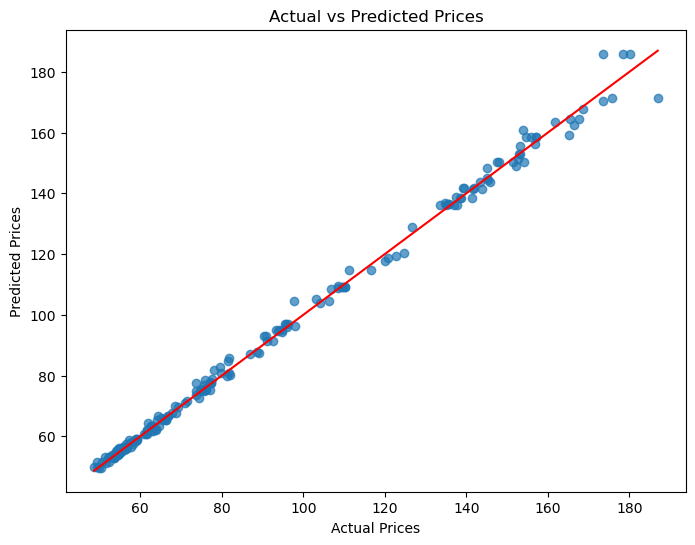

In [16]:
# Retrieve the best model 
best_model = grid_search.best_estimator_ 

# Make predictions on the test data 
y_pred = best_model.predict(X_test) 

# Evaluate model performance 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print("Test Mean Squared Error (MSE):", mse) 
print("Test R-squared (R²):", r2) 

X_train = X_train.apply(pd.to_numeric, errors='coerce') 
X_test = X_test.apply(pd.to_numeric, errors='coerce') 
X_train = X_train.dropna()   
X_test = X_test.dropna() 
X_train, y_train = X_train.dropna(), y_train[X_train.index] 

def r_squared(y_true, y_pred): 

    # (TSS) 
    tss = np.sum((y_true - np.mean(y_true))**2) 

    # (RSS) 
    rss = np.sum((y_true - y_pred)**2) 

    # R-squared 
    r2 = 1 - (rss / tss) 
    return r2 

linear_model = LinearRegression() 

linear_model.fit(X_train, y_train) 
y_pred_linear = linear_model.predict(X_test) 
r2_linear = r_squared(y_test, y_pred_linear) 

print(f"Linear Model R-squared: {r2_linear}") 

tree_model = DecisionTreeRegressor(random_state=42) 
tree_model.fit(X_train, y_train) 
y_pred_tree = tree_model.predict(X_test) 
r2_tree = r_squared(y_test, y_pred_tree) 

print(f"Decision Tree Model R-squared: {r2_tree}") 

linear_model = LinearRegression() 

linear_model.fit(X_train, y_train) 

y_pred_linear = linear_model.predict(X_test) 

mse_linear = mean_squared_error(y_test, y_pred_linear) 

print("Linear Model Mean Squared Error (MSE):", mse_linear) 

plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, y_pred, alpha=0.7) 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line 
plt.xlabel('Actual Prices') 
plt.ylabel('Predicted Prices') 
plt.title('Actual vs Predicted Prices') 
plt.show() 

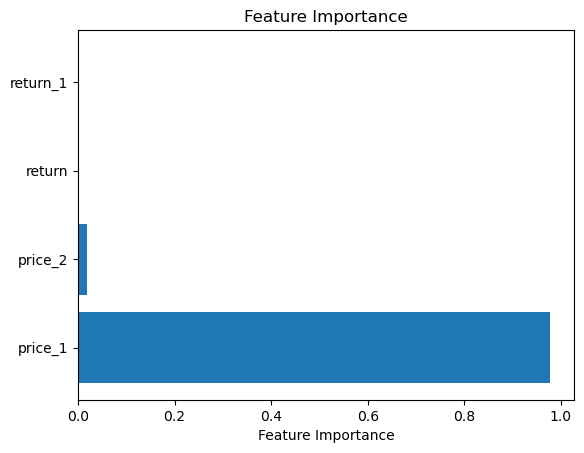

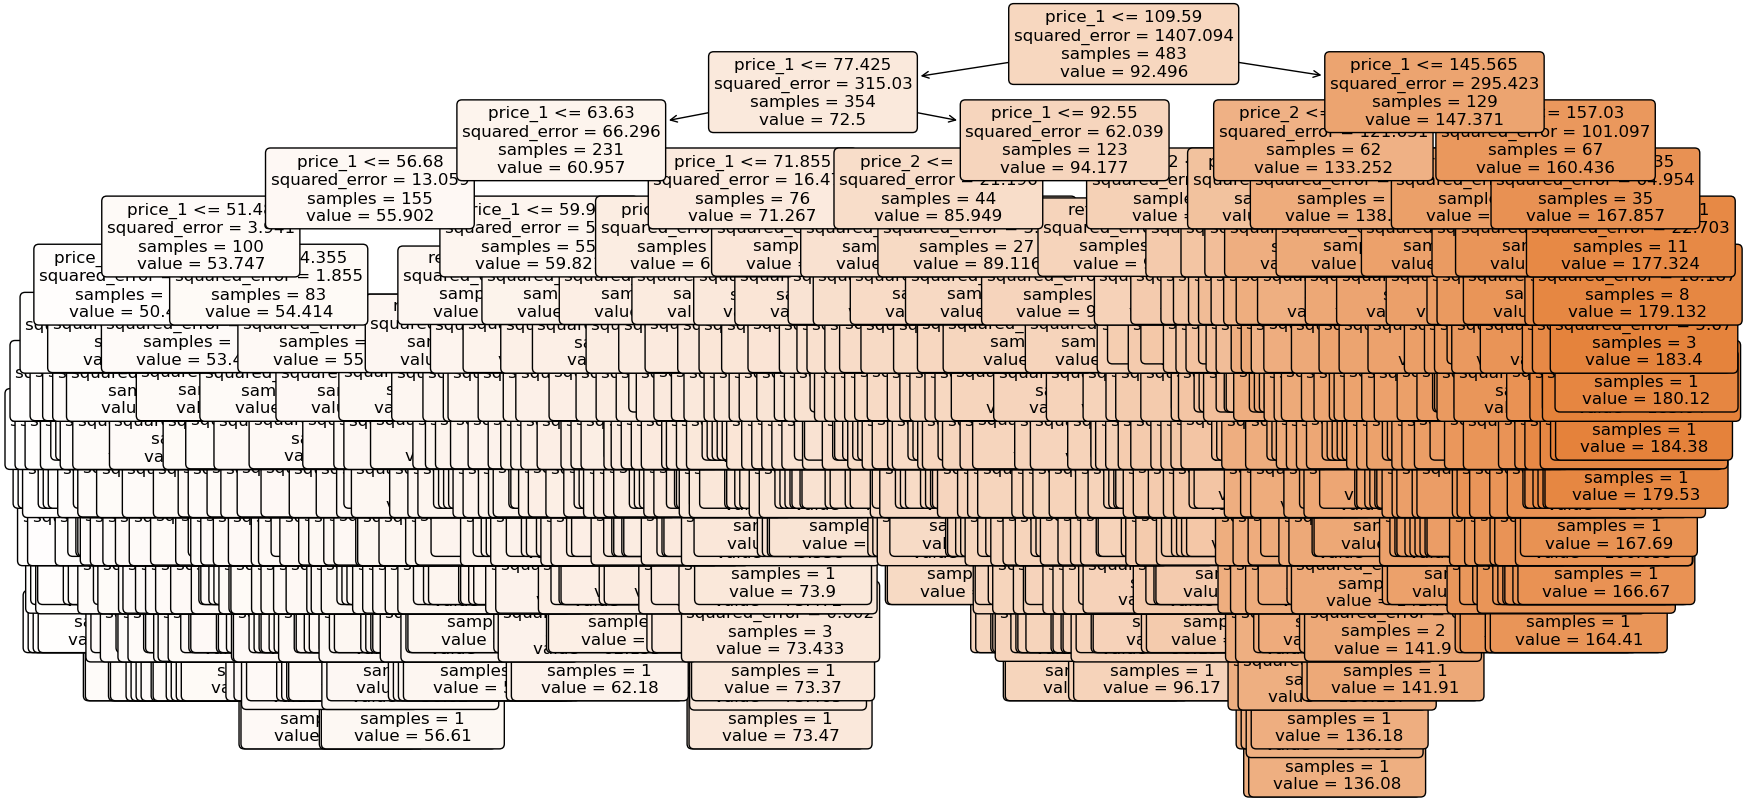

In [20]:
best_tree_model = DecisionTreeRegressor(random_state=42)
best_tree_model.fit(X_train, y_train)

# Plot feature importance 
feature_importance = best_tree_model.feature_importances_ 
plt.barh(X.columns, feature_importance) 
plt.xlabel('Feature Importance') 
plt.title('Feature Importance') 
plt.show() 
plt.figure(figsize=(20, 10)) 
plot_tree(best_tree_model, filled=True, feature_names=X_train.columns, rounded=True, fontsize=12) 
plt.show() 

import graphviz 
from sklearn.tree import export_graphviz 

dot_data = export_graphviz(best_tree_model, out_file=None,  

                           feature_names=X_train.columns,   

                           filled=True, rounded=True, special_characters=True) 

 

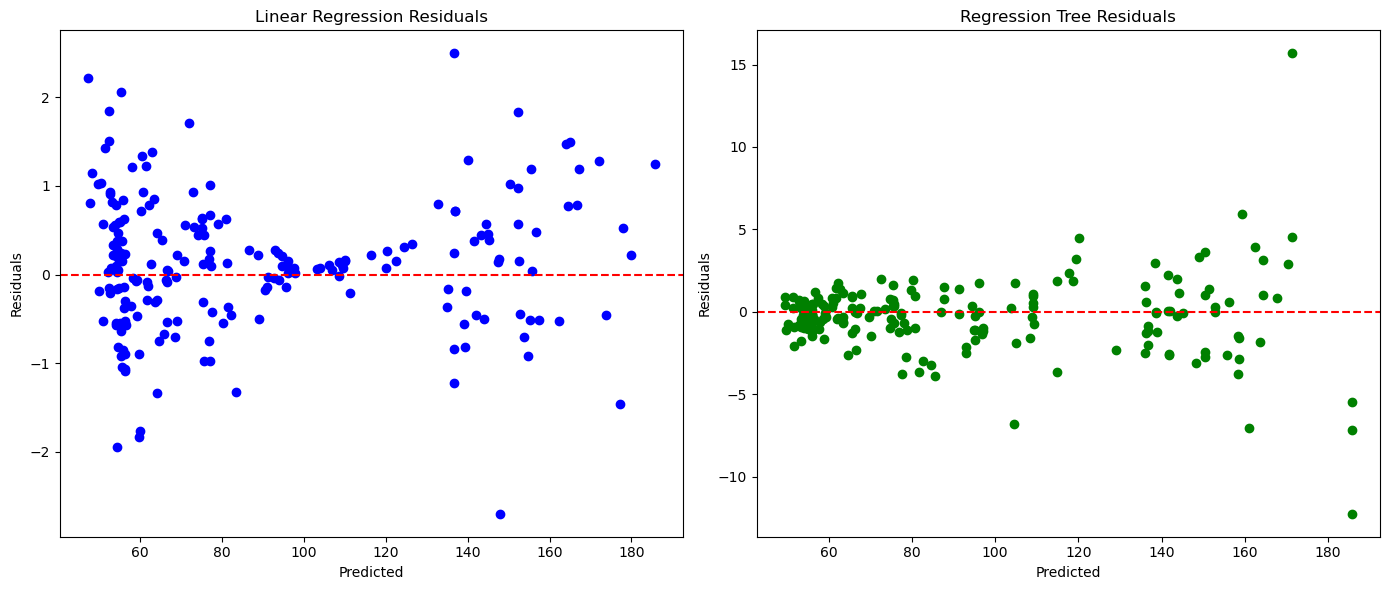

In [21]:
# Render the tree as a PDF or PNG using graphviz 

graph = graphviz.Source(dot_data) 
graph.render("regression_tree", view=True) 

# Residuals for both models 

residuals_linear = y_test - y_pred_linear 
residuals_tree = y_test - y_pred_tree 
plt.figure(figsize=(14, 6)) 


# Residuals for Linear Regression 

plt.subplot(1, 2, 1) 
plt.scatter(y_pred_linear, residuals_linear, color='blue') 
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Predicted') 
plt.ylabel('Residuals') 
plt.title('Linear Regression Residuals') 

 
# Residuals for Regression Tree 

plt.subplot(1, 2, 2) 
plt.scatter(y_pred_tree, residuals_tree, color='green') 
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Predicted') 
plt.ylabel('Residuals') 
plt.title('Regression Tree Residuals') 
plt.tight_layout() 
plt.show() 